<a href="https://colab.research.google.com/github/Lu1sV1rus/Investigacion-de-Operaciones-/blob/main/Inventario_con_descuento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=4>Inventario con descuento</font>

---

<font size=3>Importamos las librerias a utilizar</font>

In [70]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

<font size=3>Ejemplo</font>

LubeCar se especializa en cambios rápidos de aceite para motor de automóvil.

El servicio compra aceite para motor a granel, a $3$ $
 por galón.

Si LubeCar compra más de $100$ galones, obtiene un descuento de
$0.5$ $ por galón.

En el servicio se atienden unos $150$ autos diarios, y cada cambio de aceite requiere de $1.25$ galones.

LubeCar guarda el aceite a granel con un costo de $0.02$ $
 por galón y por día.

También, el costo de colocar un pedido de aceite a granel es de $20$ $.

Hay un tiempo de $2$ días para la entrega. Determine la política óptima de inventario.

In [135]:
c1, c2, d, h, K, L, Q, Qop, t1=sp.symbols("c1, c2, d, h, K, L, Q, Qop, t1")
T=sp.Function("T")
Qo=sp.Function("Qo")

In [158]:
c1=3
c2=2.5
d=187.5
h=0.02
K=20
L=2
q=1000

Paso 1. Calcular Q óptimo

In [161]:
def Qop(K,d,h):
  return np.sqrt((2*K*d)/h)

In [162]:
Qo=float(Qop(K,d,h))
print(Qo)

612.3724356957945


In [163]:
def T2(Q,c1,h,K,d,q,c2):
  return np.where(Q>q, (c2*d+(K*d)/Q+(h*Q)/2), (c1*d+(K*d)/Q+(h*Q)/2))

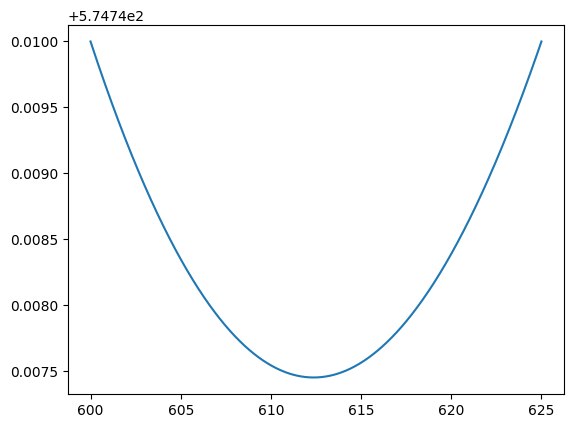

In [164]:
x=np.linspace(600,625,1000)
plt.plot(x, T2(x,c1,h,K,d,q,c2))

Paso 2. Determinar la zona en que se encuentra q

In [165]:
def T(Q):
  if Q>q:
    return (c2*d+(K*d)/Q+(h*Q)/2)
  else:
    return (c1*d+(K*d)/Q+(h*Q)/2)

In [166]:
eq=sp.Eq(Q**2 + (2/h)*(c2*d-T(Qo))*Q+2*K*d/h,0)
eq

Eq(Q**2 - 10599.7448713916*Q + 375000.0, 0)

In [167]:
sol=sp.solve(eq,Q)
sol

[35.4970848447485, 10564.2477865469]

In [168]:
sol[1] #la solución que sea mayor que q

10564.2477865469

Como $Qop=612 < q=1000 < Q_1=10564$, $q$ está en la zona II. Por tanto:

$Qoo = q$

---

Ejercicio 1: Escriba una función que calcula la Q óptima.

Es decir, que resuelva de manera interna la ecuación cuadrática y seleccione la solución correcta e indique en qué región está.

In [170]:
def Rq(Qo):
  eq=sp.Eq(Q**2 + (2/h)*(c2*d-T(Qo))*Q+2*K*d/h,0)
  sol=sp.solve(eq,Q)
  Q1=sol[1]

  if Qo<q & q<Q1:
    qoo=q
    print("La Q óptima está en la región II")
  else:
    qoo=Qo
    if Q1<q:
      print("La Q óptima está en la región III")
    else:
      print("La Q óptima está en la región I")

  return qoo

Qoop=Rq(Qo)
print("La Q óptima es:", Qoop)

La Q óptima está en la región II
La Q óptima es: 1000


In [171]:
def T3(Q, c1, c2, h, K, d, q):
    Q = np.array(Q)

    c = np.where(Q <= q, c1, c2)   # opciones

    return c*d + (K*d)/Q + (h*Q)/2

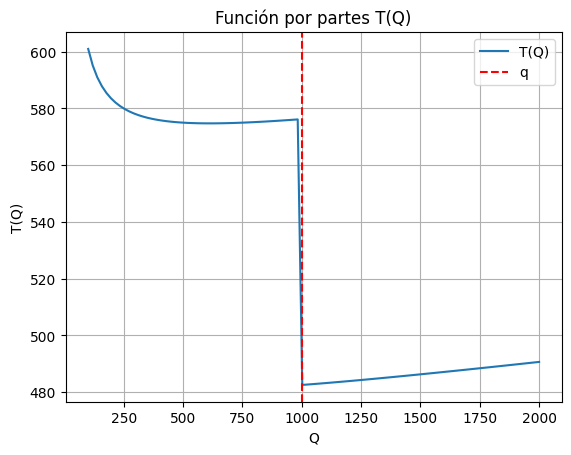

In [172]:
Q_vals = np.linspace(100, 2000, 100)

T_vals = T3(Q_vals, c1, c2, h, K, d, q)

plt.plot(Q_vals, T_vals, label="T(Q)")
plt.axvline(q, color='red', linestyle='--', label="q")  # marca el punto de quiebre

plt.xlabel("Q")
plt.ylabel("T(Q)")
plt.title("Función por partes T(Q)")
plt.legend()
plt.grid(True)
plt.show()

Para calcular el tiempo de retraso efectivo

In [173]:
t=Qo/d
print("El tiempo de retraso efectivo es:", t)

n=int(np.floor(L/t))
print("El número de pedidos es:", n)

Le=L-(n*t)
print("El tiempo de retraso restante es:", np.ceil(Le))

El tiempo de retraso efectivo es: 3.2659863237109037
El número de pedidos es: 0
El tiempo de retraso restante es: 2.0


Por tanto la política del inventario debe ser:

In [174]:
print("Pedir", q, "cuando el inventario caiga a:", np.ceil(Le*d))

Pedir 1000 cuando el inventario caiga a: 375.0


Ejercicio 2: Escribir una función que reciba los datos del problema y devuelva la política óptima del inventario.

In [175]:
def inv(c1,c2,d,h,K,L,q):
  Qopt=np.sqrt((2*K*d)/h)
  print("La Q óptima es:", Qopt)
  print("-----------------------")

  TQo=np.where(Qopt>q, (c2*d+(K*d)/Qopt+(h*Qopt)/2), (c1*d+(K*d)/Qopt+(h*Qopt)/2))
  print("La T(Q) es:", TQo)

  eq=sp.Eq(Q**2 + (2/h)*(c2*d-TQo)*Q+2*K*d/h,0)
  sol=sp.solve(eq,Q)
  Q1=sol[1]
  print("La Q1 es:", Q1)

  if Qopt<q:
    qoo=q
    print("La Q óptima está en la región II")
  else:
    qoo=Qopt
    if Qopt>Q1:
      print("La Q óptima está en la región III")
    else:
      print("La Q óptima está en la región I")

  print("La Q óptima es:", qoo)
  print("-----------------------")

  t=Qopt/d
  print("El tiempo de retraso efectivo es:", t)

  n=int(np.floor(L/t))
  print("El número de pedidos es:", n)

  Le=L-(n*t)
  print("El tiempo de retraso restante es:", np.ceil(Le))
  print("-----------------------")
  print("La política del inventario debe ser:")
  print("Pedir", np.ceil(qoo), "cuando el inventario caiga a:", np.ceil(Le*d))

inv(c1,c2,d,h,K,L,q)

La Q óptima es: 612.3724356957945
-----------------------
La T(Q) es: 574.7474487139159
La Q1 es: 10564.2477865469
La Q óptima está en la región II
La Q óptima es: 1000
-----------------------
El tiempo de retraso efectivo es: 3.2659863237109037
El número de pedidos es: 0
El tiempo de retraso restante es: 2.0
-----------------------
La política del inventario debe ser:
Pedir 1000.0 cuando el inventario caiga a: 375.0


In [183]:
# Ejemplo en clase
c1=3
c2=3
d=30
h=0.05
K=100
L=30
q=300

In [184]:
# Codigo para solo la politica de inventario
def inv2(c1,c2,d,h,K,L,q):
  Qopt=np.sqrt((2*K*d)/h)

  TQo=np.where(Qopt>q, (c2*d+(K*d)/Qopt+(h*Qopt)/2), (c1*d+(K*d)/Qopt+(h*Qopt)/2))
  eq=sp.Eq(Q**2 + (2/h)*(c2*d-TQo)*Q+2*K*d/h,0)
  sol=sp.solve(eq,Q)
  Q1=sol[1]

  qoo=np.where(Qopt<q, q, Qopt)

  t=Qopt/d
  n=int(np.floor(L/t))
  Le=L-(n*t)
  print("La política del inventario:")
  print("Pedir", np.ceil(qoo), "cuando el inventario caiga a:", np.ceil(Le*d))

inv2(c1,c2,d,h,K,L,q)

La política del inventario:
Pedir 347.0 cuando el inventario caiga a: 208.0


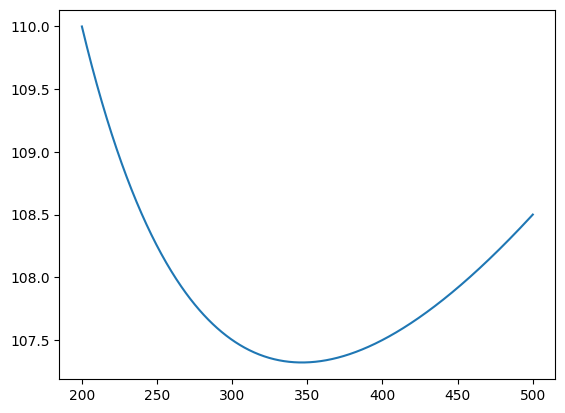

In [185]:
x=np.linspace(200,500,1000)
plt.plot(x, T2(x,c1,h,K,d,q,c2))